### Imputation 

#### MCAR: Missing Completely at random :
* There is no pattern observed for Missing data. Data is randomly missing
* There is no relationship between the missingness of the data and any values, observed or missing. 
* Those missing data points are a random subset of the data. 
* There is nothing systematic going on that makes some data more likely to be missing than others.

#### MAR: Missing at Random:
* There is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
* Whether an observation is missing has nothing to do with the missing values, but it does have to do with the values of an individual’s observed variables. 
  For example, men are more likely to tell you their weight than women, weight is MAR
* Missing data is dependent on other co-variates or other independent variables

#### MNAR: Missing Not at Random
* There is a relationship between the propensity of a value to be missing and its values. 
  This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study.

* MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. You have to include some model for why the data are missing and what the likely values are.

### Mean and median imputation
* Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can then be then used for machine learning.
* Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution)

#### Assumption
Mean/median imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, we can think of replacing the NA with the most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'./data/titanic_feature.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# missing values
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
# impute missing values with mean
mean_age_rounded = np.round(df['Age'].mean())
                            
df['Age_Mean'] = df['Age'].fillna(mean_age_rounded)

In [36]:
# impute missing values with median
median_age = df['Age'].median()

df['Age_Median'] = df['Age'].fillna(median_age)

In [37]:
# random sampling
df['Age_Random'] = df['Age']

missing_count = df['Age'].isna().sum()

random_sample = df['Age'].dropna().sample(missing_count, random_state = 0)
random_sample.index = df[df['Age'].isna()].index

df.loc[df['Age'].isna(), 'Age_Random'] = random_sample

In [39]:
# Check those records where Age is missing 
df.loc[df['Age'].isna(), ['Age', 'Age_Mean', 'Age_Median', 'Age_Random']]

,Age,Age_Mean,Age_Median,Age_Random
5,NaN,30.0,28.0,28.00
17,NaN,30.0,28.0,50.00
19,NaN,30.0,28.0,0.92
26,NaN,30.0,28.0,36.00
28,NaN,30.0,28.0,26.00
...,...,...,...,...
859,NaN,30.0,28.0,22.00
863,NaN,30.0,28.0,25.00
868,NaN,30.0,28.0,15.00
878,NaN,30.0,28.0,34.00


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

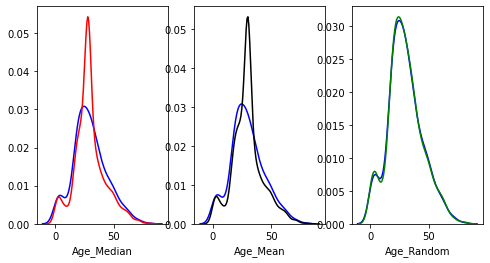

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (8,4))

sns.distplot(df['Age'], hist=False, color='blue',  ax=ax[0])
sns.distplot(df['Age_Median'], hist=False, color='red', ax=ax[0])

sns.distplot(df['Age'], hist=False, color='blue',  ax=ax[1])
sns.distplot(df['Age_Mean'], hist=False, color='black', ax=ax[1])

sns.distplot(df['Age'], hist=False, color='blue',  ax=ax[2])
sns.distplot(df['Age_Random'], hist=False, color='green', ax=ax[2])

plt.show()